# Class 3: Loading Data, Tokenization, Exploratory Analysis
For this class we will use the dataset [57,650 Spotify Songs](https://www.kaggle.com/datasets/joebeachcapital/57651-spotify-songs) from Kaggle. You can download directly from the website using their API, but for simplicity you can find the file on Canvas. 

Before starting, we need to install libraries that will turn out useful:
```
conda install matplotlib
conda install -c conda-forge spacy
python -m spacy download en_core_web_sm
conda install anaconda::scikit-learn
conda install anaconda::gensim
```
We are installing matlib and spaCy. Notice here that for spaCy we are installing a pipeline that is optimized for English. If you need to analyze text in other languages using spaCy, check [this page](https://spacy.io/usage) and select the right pipeline.

In [1]:
import os
os.chdir("Text_as_data/Data/Class3")
import pandas as pd
import matplotlib.pyplot as plt #We will use this package to make plots

In [2]:
df = pd.read_csv("Spotify Million Song Dataset_exported.csv")

In [3]:
#We won't be using the column "link" so let's eliminate
df = df.drop(columns="link")

In [4]:
df.describe()

,artist,song,text
count,57650,57650,57650
unique,643,44824,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,I just came back from a lovely trip along the ...
freq,191,35,6


You can see we have 57650 songs from 643 artists. Already from there we see that Donna Summer has 191 songs. Another way to confirm this is the following:

In [5]:
len(df.loc[df["artist"]=="Donna Summer"])

191

In [6]:
artists = df[['song', 'artist']].groupby(by="artist").count()
artists.head()

,song
artist,
'n Sync,93
ABBA,113
Ace Of Base,74
Adam Sandler,70
Adele,54


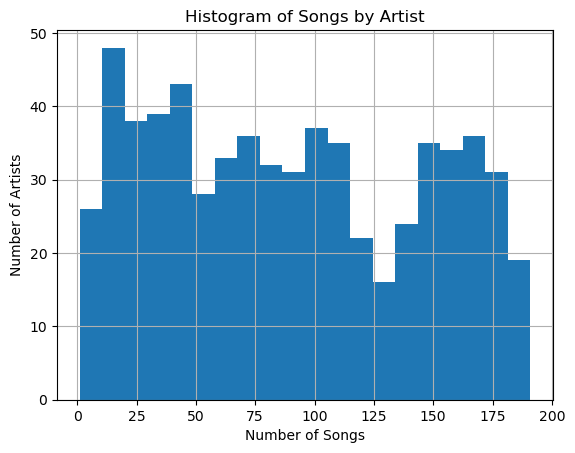

In [7]:
# Plot the histogram using pandas plot_hist
artists['song'].hist(bins=20)
plt.title('Histogram of Songs by Artist')
plt.xlabel('Number of Songs')
plt.ylabel('Number of Artists')
plt.show()

## Songs Songs Songs
We are interested in the lyrics of the songs.

In [8]:
#How many words do these lyrics contain?
df['len']=df['text'].str.split(" ").str.len()
df.head()

,artist,song,text,len
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \nAnd...",174
1,ABBA,"Andante, Andante","Take it easy with me, please \nTouch me gentl...",316
2,ABBA,As Good As New,I'll never know why I had to go \nWhy I had t...,354
3,ABBA,Bang,Making somebody happy is a question of give an...,243
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...,241


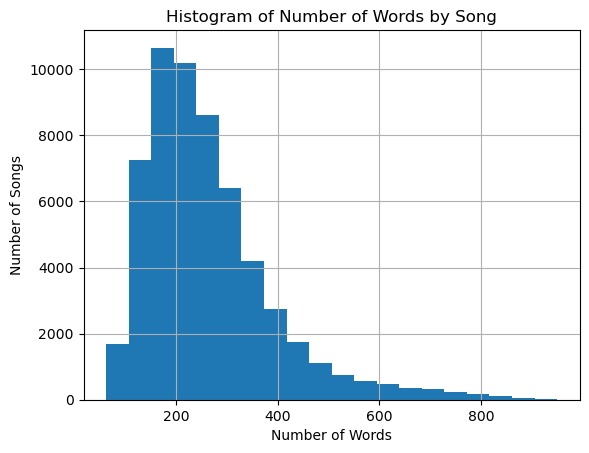

In [9]:
df['len'].hist(bins=20)
plt.title('Histogram of Number of Words by Song')
plt.xlabel('Number of Words')
plt.ylabel('Number of Songs')
plt.show()

In [10]:
df.loc[df["len"]==0].head(20)

,artist,song,text,len


In [11]:
df['len'].describe()

count    57650.000000
mean       263.761995
std        127.158084
min         63.000000
25%        175.000000
50%        236.000000
75%        317.000000
max        950.000000
Name: len, dtype: float64

Let's  look at an "average" song in terms of length, we can take a song in the 50th percentile.

In [12]:
df['text'].loc[df['len']==236].iloc[0]

"Come to my loveland, wander along  \nBeautiful gardens full of flowers and songs  \nCome to the sunshine, beaches and sand  \nHere's the two bluebirds, won't you come to my land  \n  \nThe grass is mellow and the sky is blue  \nMy paradise is waiting here for you  \n  \nOh, it's a tropical loveland  \nOh, I want to share it with you  \nLife can be funny  \nHappy and sunny  \nOh, in my tropical loveland  \n  \nCome to my loveland, wander with me  \nLie with me darling in the shade of a tree  \nOver the rainbow, under the moon  \nThat's where my land is, won't you come to me soon?  \n  \nJust take my hand, I'll show you everything  \nThe secrets that my paradise can bring  \n  \nOh, it's a tropical loveland  \nOh, I want to share it with you  \nLife can be funny  \nHappy and sunny  \nOh, in my tropical loveland  \n  \nOh, it's a tropical loveland  \nOh, I want to share it with you  \n(I want to share it with you)  \nOh, it's a tropical loveland  \n(It's a tropical loveland)  \nOh, I wan

You might have noticed the string \n, which identifies a new line. 

In [13]:
print(df['text'].loc[df['song']=="Blowin' In The Wind"].iloc[0])

How many roads must a man walk down  
Before you can call him a man?  
How many seas must a white dove sail  
Before she sleeps in the sand?  
Yes, how many times must the cannon balls fly  
Before they're forever banned?  
The answer my friend is blowin' in the wind  
The answer is blowin' in the wind.  
  
Yes, how many years can a mountain exist  
Before it's washed to the sea?  
Yes, how many years can some people exist  
Before they're allowed to be free?  
Yes, how many times can a man turn his head  
Pretending he just doesn't see?  
The answer my friend is blowin' in the wind  
The answer is blowin' in the wind.  
  
Yes, how many times must a man look up  
Before he can really see the sky?  
Yes, how many ears must one man have  
Before he can hear people cry?  
Yes, how many deaths will it take till he knows  
That too many people have died?  
The answer my friend is blowin' in the wind  
The answer is blowin' in the wind.


In [14]:
df.columns

Index(['artist', 'song', 'text', 'len'], dtype='object')

### Keeping track of memory usage 

In [15]:
# Calculate memory usage
total_memory_bytes = df.memory_usage(deep=True).sum()
total_memory_megabytes = total_memory_bytes / (1024 ** 2)

print(f"Total memory usage of the DataFrame: {total_memory_megabytes:.2f} MB")

Total memory usage of the DataFrame: 76.14 MB


Here we observe how many megabytes (MB) of memory our dataset occupies. This dataset is sufficiently small and should not cause any problems on your computer. However, as the dataset grows larger, it's crucial to monitor memory usage: it may not be possible to run the code in your laptop! Also, paying attention to memory usage can help us spot elements that make our code inefficient.

A prudent approach, particularly with large datasets, is to test your code on a random subset of the data first. This strategy enables faster execution and allows us to address any issues before applying the code to the entire dataset.

In class, we will use a random subset of 1000 songs.

In [16]:
df = df.sample(n=1000, random_state=123).reset_index(drop=True)

# Tokens
We now want to create tokens so that we can then proceed to simplify the text. 

## NLTK
For other material, see [NLTK book chapter 3](https://www.nltk.org/book/ch03.html).

In [17]:
import nltk
df['tokens']=df['text'].apply(nltk.word_tokenize)

In [18]:
df[['text', 'tokens']].head()

,text,tokens
0,Gone too far \nGone too long \nMessed it up ...,"[Gone, too, far, Gone, too, long, Messed, it, ..."
1,"Well, your railroad gate, you know I just can'...","[Well, ,, your, railroad, gate, ,, you, know, ..."
2,Hobo - I'm hobophobic So what ah ah ah \nScar...,"[Hobo, -, I, 'm, hobophobic, So, what, ah, ah,..."
3,This is the most unusual story \nOf a most un...,"[This, is, the, most, unusual, story, Of, a, m..."
4,There's a girl in the mirror \nI wonder who s...,"[There, 's, a, girl, in, the, mirror, I, wonde..."


In [19]:
#We can look at the first 15 tokens obtained from the first song. 
df.loc[0,'tokens'][0:15]

['Gone',
 'too',
 'far',
 'Gone',
 'too',
 'long',
 'Messed',
 'it',
 'up',
 'completely',
 'Till',
 'everything',
 'is',
 'wrong',
 'Stop']

Here we are interested in splitting into words. The task is simple, as tokens we are getting words and punctuation. The format is the one of a list of elements. Notice also that they are ordered as list keep information about the order. We could have accomplished a similar task using .str methods seen above.   

Different packages offer various algorithms for tokenization, and depending on the application, you may want to use tokens that are complete words, parts of words such as syllables, or entire sentences.

## Spacy
We introduce here *spaCy* another library that we will be using also in the next part of the course. SpaCy too offers a tokenizer, which they explain nicely [in this page](https://spacy.io/usage/linguistic-features#tokenization).

In [20]:
import spacy

In [21]:
nlp = spacy.load("en_core_web_sm") #Here we are loading the model with the pipeline for English that we previously downloaded

This approach is a bit more complex than the previous one, but generally more powerful. However, in this simple case, we might not notice much of a difference.

In [22]:
#Example with the first song
song = nlp(df.loc[0,'text'])

In [23]:
type(song)

spacy.tokens.doc.Doc

In [24]:
for token in song[0:15]: #this is a loop! We are iterating through all elements contained in the object song
    print(token)

Gone
too
far
 

Gone
too
long
 

Messed
it
up
completely
 

Till
everything


In [25]:
for token in song[0:15]:
    print(token.text, " ", token.pos_, " ", token.lemma_)

Gone   VERB   go
too   ADV   too
far   ADV   far
 
   SPACE    

Gone   VERB   go
too   ADV   too
long   ADV   long
 
   SPACE    

Messed   VERB   mess
it   PRON   it
up   ADP   up
completely   ADV   completely
 
   SPACE    

Till   SCONJ   till
everything   PRON   everything


The example above shows that Spacy has also assigned part of speech tags to all tokens. We don't need this for the moment, so let's go back to the tokens. We want to keep only the text from the tokens.  

In [26]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "lemmatizer", "attribute_ruler"])  #see https://github.com/explosion/spaCy/discussions/8402, we are trying to increase the speed

In [27]:
df['tokens_spacy'] = df['text'].apply(lambda x: [token.text for token in nlp(x)])

The code above is quite complex, let's look at its components:
-`df['text']` takes the value stored in the column 'text'
-`.apply()` is a pandas methods that applies a function that the user specifies
-`lambda x:` this is our way to specify a function. In this case, it is a lambda function, which we define after the ":"
-`[token.text for token in nlp(x)]` creates a list `[ ]` obtained by applying the method `.text` to every token obtained when we apply `nlp()` to the input `x`. In this case, `x` will be the value of a cell in the colum 'text'

We are doing something similar to what we did in the cell above, but we are writing in a compact way and we are requesting to do this operation for all songs in the dataframe. 

In [28]:
df.loc[0, 'tokens_spacy']

['Gone',
 'too',
 'far',
 ' \n',
 'Gone',
 'too',
 'long',
 ' \n',
 'Messed',
 'it',
 'up',
 'completely',
 ' \n',
 'Till',
 'everything',
 'is',
 'wrong',
 ' \n',
 'Stop',
 ',',
 'start',
 'over',
 ',',
 'start',
 'again',
 ' \n',
 'Too',
 'many',
 'pieces',
 ' \n',
 'Too',
 'much',
 'to',
 'chew',
 ' \n',
 'How',
 'can',
 'you',
 'ever',
 'win',
 ' \n',
 'When',
 'you',
 "'re",
 'so',
 'scared',
 'to',
 'loose',
 ' \n',
 'You',
 'better',
 'stop',
 ',',
 'start',
 'over',
 ',',
 'start',
 'again',
 ' \n',
 'Stop',
 ',',
 'start',
 'over',
 ',',
 'start',
 'again',
 ' \n',
 'Walk',
 'away',
 ' \n',
 'See',
 'what',
 'it',
 'looks',
 'like',
 'from',
 'here',
 ' \n',
 'If',
 'you',
 'stay',
 'you',
 'will',
 'only',
 'drown',
 ' \n',
 'If',
 'a',
 'mass',
 'of',
 'fear',
 ' \n',
 'You',
 'need',
 'to',
 'sleep',
 ' \n',
 'You',
 'need',
 'a',
 'break',
 ' \n',
 'You',
 'got',
 'to',
 'find',
 'out',
 'before',
 'it',
 "'s",
 'to',
 'late',
 ' \n',
 'Stop',
 ',',
 'start',
 'again',
 ' 

Notice how the tokens are not exactly the same, every step involves some decisions, even in this relative straightforward tasks.

### Speed sometimes matters
You might have noticed that this last way of calculating tokens, for its complex nature, took more time to run. Depending on how big the dataset is and which operations you need to run with it, it can be important to look at which approach is faster. To illustrate this point, we will create a smaller dataframe with just 1000 and calculate tokens in three different ways.

In [29]:
%%time

df['text'].str.replace(r'([^\w\s])', r' \1 ', regex=True).str.split()

CPU times: user 35.4 ms, sys: 2.41 ms, total: 37.8 ms
Wall time: 37.3 ms


0      [Gone, too, far, Gone, too, long, Messed, it, ...
1      [Well, ,, your, railroad, gate, ,, you, know, ...
2      [Hobo, -, I, ', m, hobophobic, So, what, ah, a...
3      [This, is, the, most, unusual, story, Of, a, m...
4      [There, ', s, a, girl, in, the, mirror, I, won...
                             ...                        
995    [When, the, sun, is, high, in, the, afternoon,...
996    [Nobody, ', s, perfect, Not, even, a, perfect,...
997    [Everybody, is, lazy, Nobody, wants, to, do, a...
998    [Please, don, ', t, fight, me, baby, This, sil...
999    [Sunday, ', s, got, a, slave, Monday, ', s, go...
Name: text, Length: 1000, dtype: object

Here we use pandas' string methods and a regular expression:
-`[^\w\s]` matches any character that is not a word character (denoted by \w) and not a whitespace character (denoted by \s).
-`r' \1 '` replaces each match with itself (\1 refers to the matched character) surrounded by spaces.

In [30]:
%%time
df['text'].apply(nltk.word_tokenize)

CPU times: user 454 ms, sys: 4.09 ms, total: 458 ms
Wall time: 463 ms


0      [Gone, too, far, Gone, too, long, Messed, it, ...
1      [Well, ,, your, railroad, gate, ,, you, know, ...
2      [Hobo, -, I, 'm, hobophobic, So, what, ah, ah,...
3      [This, is, the, most, unusual, story, Of, a, m...
4      [There, 's, a, girl, in, the, mirror, I, wonde...
                             ...                        
995    [When, the, sun, is, high, in, the, afternoon,...
996    [Nobody, 's, perfect, Not, even, a, perfect, s...
997    [Everybody, is, lazy, Nobody, wants, to, do, a...
998    [Please, do, n't, fight, me, baby, This, silen...
999    [Sunday, 's, got, a, slave, Monday, 's, got, o...
Name: text, Length: 1000, dtype: object

In [31]:
%%time
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "lemmatizer", "attribute_ruler"]) 
df['text'].apply(lambda x: [token.text for token in nlp(x)])

CPU times: user 9.83 s, sys: 206 ms, total: 10 s
Wall time: 10.1 s


0      [Gone, too, far,  \n, Gone, too, long,  \n, Me...
1      [Well, ,, your, railroad, gate, ,, you, know, ...
2      [Hobo, -, I, 'm, hobophobic, So, what, ah, ah,...
3      [This, is, the, most, unusual, story,  \n, Of,...
4      [There, 's, a, girl, in, the, mirror,  \n, I, ...
                             ...                        
995    [When, the, sun, is, high, in, the, afternoon,...
996    [Nobody, 's, perfect,  \n, Not, even, a, perfe...
997    [Everybody, is, lazy,  \n, Nobody, wants, to, ...
998    [Please, do, n't, fight, me, baby,  \n, This, ...
999    [Sunday, 's, got, a, slave,  \n, Monday, 's, g...
Name: text, Length: 1000, dtype: object

## Simplify Text

Now we can simplify the text. We will follow the standard procedure.

In [32]:
import re
df['tokens_simple']=df['tokens'].apply(lambda x: [re.sub(r'[^\w\s]', '', i).lower() for i in x]) #remove puntuaction, lowercase
df['tokens_simple'] = df['tokens_simple'].apply(lambda x: [re.sub(r'\d+', '', i) for i in x]) #remove digits
df['tokens_simple']=df['tokens_simple'].apply(lambda x: [i for i in x if len(i)>2]) #remove short tokens

#### Gensim
[Gensim](https://radimrehurek.com/gensim/) is another package that offers a convenient way to process text. Let's use the `simple_preprocess()` function.

In [33]:
from gensim.utils import simple_preprocess
df['token_gensim'] = df['text'].apply(lambda x: simple_preprocess(x))


In [34]:
df['tokens_simple'].head()

0    [gone, too, far, gone, too, long, messed, comp...
1    [well, your, railroad, gate, you, know, just, ...
2    [hobo, hobophobic, what, scared, bums, not, ju...
3    [this, the, most, unusual, story, most, unusua...
4    [there, girl, the, mirror, wonder, who, she, s...
Name: tokens_simple, dtype: object

#### Stopwords

In [35]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
print(stoplist)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/trotesi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This is the list of stopwords according to NLTK. Once again, it is possible to find other lists, with more words in them.

In [36]:
#remove stop words
df['tokens_simple']=df['tokens_simple'].apply(lambda x: [i for i in x if not i in stoplist]) #remove empty strings
df['tokens_simple'].head()

0    [gone, far, gone, long, messed, completely, ti...
1    [well, railroad, gate, know, jump, sometimes, ...
2    [hobo, hobophobic, scared, bums, stink, bad, c...
3    [unusual, story, unusual, girl, paint, picture...
4    [girl, mirror, wonder, sometimes, think, know,...
Name: tokens_simple, dtype: object

In [37]:
stemmer = nltk.stem.porter.PorterStemmer()
stemmer.stem('wonderful')

'wonder'

In [38]:
stemmer.stem('family')

'famili'

In [39]:
stemmer.stem('families')

'famili'

In [40]:
print(stemmer.stem('see'), stemmer.stem('saw'))

see saw


In [41]:
print(stemmer.stem('look'), stemmer.stem('looked'))

look look


In [42]:
#stem
df['tokens_simple']=df['tokens_simple'].apply(lambda x: [stemmer.stem(i) for i in x]) 
df['tokens_simple'].head()

0    [gone, far, gone, long, mess, complet, till, e...
1    [well, railroad, gate, know, jump, sometim, ge...
2    [hobo, hobophob, scare, bum, stink, bad, crack...
3    [unusu, stori, unusu, girl, paint, pictur, unu...
4    [girl, mirror, wonder, sometim, think, know, s...
Name: tokens_simple, dtype: object

### Functions

In [43]:
#Here combine the previous steps into one unique function that takes as input a dataframe and returns the same dataframe, with added list of tokens following the same steps we just did

def preprocess_text(df, text_column):
    # Tokenize
    df['tokens'] = df[text_column].apply(nltk.word_tokenize)

    # Remove punctuation, lowercase, remove empty strings, filter stopwords, and stem
    df['tokens_simple'] = df['tokens'].apply(lambda x: [re.sub(r'[^\w\s]', '', token).lower() for token in x])
    df['tokens_simple'] = df['tokens_simple'].apply(lambda x: [token for token in x if token and not token in stoplist])
    df['tokens_simple'] = df['tokens_simple'].apply(lambda x: [stemmer.stem(token) for token in x])

    # Drop the intermediate 'tokens' column if not needed
    df.drop(columns=['tokens'], inplace=True)

    return df


### Building the document-feature matrix

One way of representing a set of documents is by using the a document-feature matrix, where each column refers to a token, and each row refers to a document. We can start by looking at how one document, in this case a song, appears in the form of a vector:

In [44]:
from collections import Counter
Counter(df.loc[0,'tokens_simple'])

Counter({'start': 9,
         'stop': 5,
         'gone': 2,
         'better': 2,
         'need': 2,
         'far': 1,
         'long': 1,
         'mess': 1,
         'complet': 1,
         'till': 1,
         'everyth': 1,
         'wrong': 1,
         'mani': 1,
         'piec': 1,
         'much': 1,
         'chew': 1,
         'ever': 1,
         'win': 1,
         'scare': 1,
         'loos': 1,
         'walk': 1,
         'away': 1,
         'see': 1,
         'look': 1,
         'like': 1,
         'stay': 1,
         'drown': 1,
         'mass': 1,
         'fear': 1,
         'sleep': 1,
         'break': 1,
         'got': 1,
         'find': 1,
         'late': 1})

These are tokens that appear in the first song. If this song was to appear as a row in the document-feature matrix, we would also see many 0s, for all tokens that appear in other songs, but not in the first one. 

Let's now count the ow many times each token appears in the dataset. One simple way to do this is to initialize a counter and then add the counts song by song. 

In [45]:
counts = Counter(df.loc[0,'tokens_simple'])
for i in range(1, len(df)):
    counts += Counter(df.loc[i,'tokens_simple'])

In [46]:
counts

Counter({'love': 1653,
         'know': 1313,
         'like': 1120,
         'got': 983,
         'come': 928,
         'get': 908,
         'want': 874,
         'time': 827,
         'see': 810,
         'never': 764,
         'one': 753,
         'babi': 734,
         'say': 711,
         'let': 711,
         'make': 662,
         'feel': 658,
         'take': 626,
         'way': 559,
         'day': 552,
         'need': 535,
         'yeah': 526,
         'heart': 525,
         'back': 522,
         'caus': 517,
         'night': 500,
         'life': 495,
         'gon': 492,
         'look': 445,
         'could': 441,
         'tell': 438,
         'away': 430,
         'girl': 425,
         'think': 420,
         'well': 419,
         'right': 412,
         'good': 409,
         'man': 397,
         'choru': 396,
         'home': 395,
         'thing': 379,
         'give': 355,
         'eye': 348,
         'world': 347,
         'said': 321,
         'long': 308,
         

In [47]:
len(counts)

8421

Even with a limited number of songs, we have 8421 tokens.

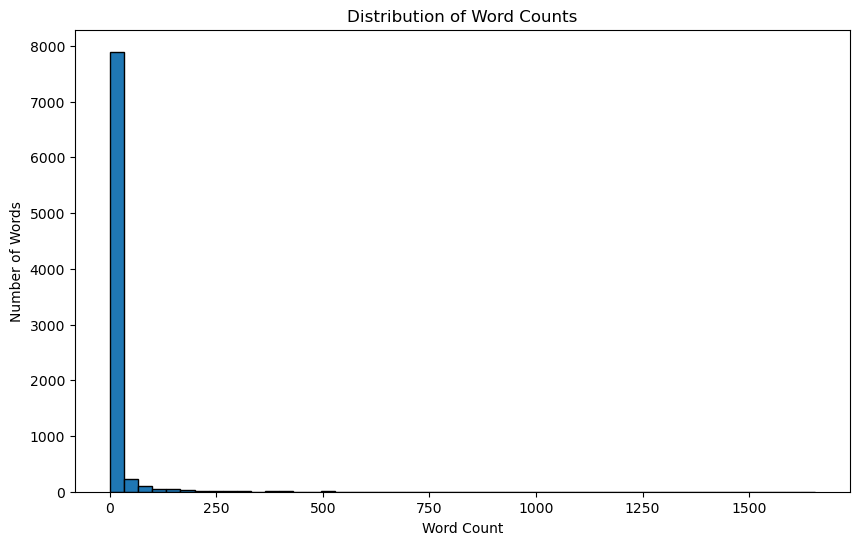

In [48]:
frequencies = list(counts.values())

# Plot the histogram
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.hist(frequencies, bins=50, edgecolor='k')  # Adjust the number of bins for better resolution
plt.title('Distribution of Word Counts')  # Add a title to the histogram
plt.xlabel('Word Count')  # Label for the x-axis
plt.ylabel('Number of Words')  # Label for the y-axis
#plt.yscale('log', nonpositive='clip')  # Use a log scale for the y-axis to better display the distribution
plt.show()

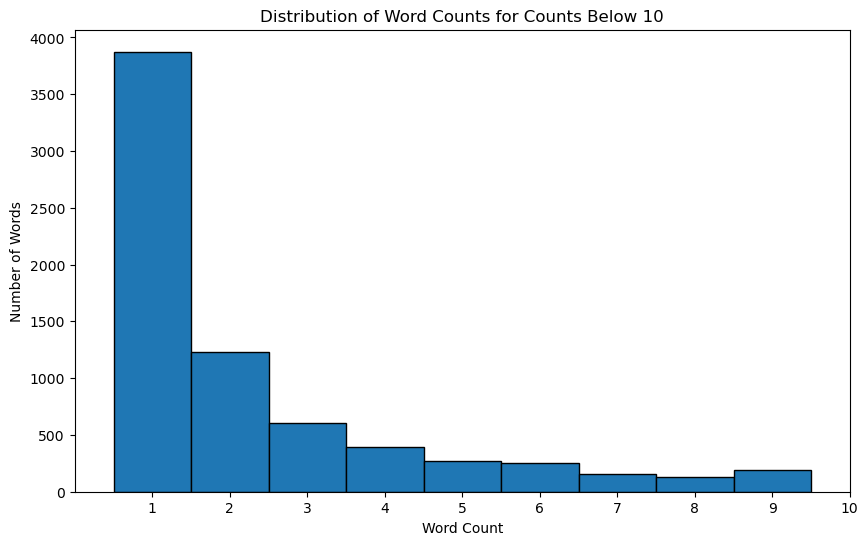

In [49]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.hist(frequencies, bins=range(1, 11), edgecolor='k', align='left')  # Specify bins for counts 1 through 10
plt.title('Distribution of Word Counts for Counts Below 10')  # Add a title to the histogram
plt.xlabel('Word Count')  # Label for the x-axis
plt.ylabel('Number of Words')  # Label for the y-axis
plt.xticks(range(1, 11))  # Set x-ticks to show each word count value
plt.xlim(0, 10)  # Limit the x-axis to show up to count 10
plt.show()

This is common, there are words that are rare (could also be due to typos). In this case, this is also due to the fact that we are only using 1000 songs. Let's see some of these words. 

In [50]:
[word for word, count in counts.items() if count == 1][0:100] #print the first 100

['finlli',
 'penitentiari',
 'riverboat',
 'persian',
 'drunkard',
 'hobophob',
 'cracker',
 'lysol',
 'infest',
 'endocrin',
 'suckin',
 'bipolar',
 'savin',
 'discret',
 'practual',
 'mystic',
 'wreckag',
 'daforc',
 'coars',
 'mismanag',
 'hare',
 'liquifi',
 'hernia',
 'knucl',
 'india',
 'dubplat',
 'cheddar',
 'click',
 'clack',
 'aiyyo',
 'circumcis',
 'unnatur',
 'junki',
 'flask',
 'hardhead',
 'coldheart',
 'tattl',
 'tor',
 'dustfil',
 'meaningless',
 'serenad',
 'fightin',
 'martian',
 'bassi',
 'bach',
 'maraca',
 'voiceov',
 'frontier',
 'flake',
 'crocodil',
 'inspect',
 'philistin',
 'strung',
 'hampstead',
 'incid',
 'rig',
 'harpsichord',
 'glade',
 'unshown',
 'playth',
 'neckti',
 'remnant',
 'recent',
 'marbl',
 'monsieur',
 'fez',
 'ambassador',
 'attendezv',
 'sil',
 'plait',
 'upstair',
 'horsedrawn',
 'handwritten',
 'chandeli',
 'volcano',
 'erupt',
 'boiler',
 'beaucoup',
 'cronkit',
 'hardluck',
 'defil',
 'desecr',
 'unbound',
 'litali',
 'pere',
 'peu',
 '

### Vectorization

In principle, you may build the document-feature matrix using the counts above, document by document. In practice, there are packages we can use that include additional features.  

We will now consider the vectorizer available with [scikit-learn](https://scikit-learn.org/stable/) a popular python library for machine learnig. We will now use the Count Vectorizer, an overview of the Bag of Word representation by scikit-learn is available [here](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). Documentation for the CountVectorizer class is availabel [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer). Notice that this class offers some built-in options to simplify the text and tokenize.

A CountVectorizer expects strings as inputs, while now our data appear as lists of tokens. We will need to join these tokens first.

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=None,
                             lowercase=False,
                             min_df=0.005,  #minimum document frequency
                             max_df=0.95,
                             #binarybool, default=False  <-- use this if you want binary
                             )

X = vectorizer.fit_transform(df['tokens_simple'].apply(lambda tokens: " ".join(tokens)))

Please note that when we use CountVectorizer, it returns a CountVectorizer object (vectorizer) and a csr_matrix object (X). The abbreviation "csr" refers to Compressed Sparse Row matrix, an efficient format for storing matrices with a high volume of zeroes. This format significantly reduces memory usage and speeds up computations involving sparse data.

In [52]:
X.shape

(1000, 1683)

The X matrix has 1000 rows (the number of documents) and 1683 columns (the number of tokens). With respect to the list of tokens we are missing tokens that are too common or too uncommon according to our filter.

In [53]:
vectorizer.get_feature_names_out()

array(['abl', 'absolut', 'abus', ..., 'york', 'young', 'zone'],
      dtype=object)

In [54]:
row_dense = X[0].toarray()

print(row_dense[:, 0:100])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [55]:
vectorizer.get_feature_names_out()[71]

'away'

We have seen considered the whole process step by step. In practice, it is often simpler to use methods from packages, especially when the set of tokens needed is standard and there are no special choices involved.

### Considering n-grams

What if instead of unigrams we were considering bigrams as well?

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer2 = CountVectorizer(tokenizer=None,
                             lowercase=False,
                             ngram_range=(1,2)
                             )

X2 = vectorizer2.fit_transform(df['tokens_simple'].apply(lambda tokens: " ".join(tokens)))

In [57]:
X2.shape

(1000, 69352)

In [58]:
vectorizer2.get_feature_names_out()

array(['aaaaaaaah', 'aaaaaaaah may', 'aaaaaaah', ..., 'zoom zoom', 'zwei',
       'zwei herren'], dtype=object)

Again, we could consider filtering out some bigrams.

Let's now consider bigrams, to try to identify if there are bigrams that seem to have meaning. With the basic approach available using NLTK, we need to put all text we have as a unique sequence of tokens, losing therefore the separation between songs. 

In [59]:
text_tokens_all = [token for song in df['tokens_simple'] for token in song]

In [60]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(text_tokens_all)

In [61]:
finder.nbest(bigram_measures.raw_freq, 15) 

[('love', 'love'),
 ('yeah', 'yeah'),
 ('feel', 'like'),
 ('know', 'know'),
 ('come', 'back'),
 ('never', 'never'),
 ('come', 'come'),
 ('chang', 'mind'),
 ('got', 'get'),
 ('bala', 'bala'),
 ('know', 'love'),
 ('one', 'day'),
 ('want', 'want'),
 ('hey', 'hey'),
 ('good', 'good')]

These are the 15 most common bigrams, what do you notice?

### Discovery: Find associated words
We can use pointwise mutual information to detect which combinations of tokens appear to be more commonly related.

In [62]:
finder.nbest(bigram_measures.pmi, 10)

[('abod', 'glasgow'),
 ('abund', 'thicken'),
 ('accompagnera', 'passando'),
 ('achiev', 'result'),
 ('acorn', 'schall'),
 ('addictionsubtract', 'ad'),
 ('africa', 'brazil'),
 ('africu', 'tex'),
 ('afrika', 'korp'),
 ('agetai', 'unmei')]

In [63]:
finder.apply_freq_filter(4) #Filter, at leat 5 occurrences
finder.nbest(bigram_measures.pmi, 10)

[('bossa', 'nova'),
 ('isat', 'isa'),
 ('lunch', 'gina'),
 ('marlon', 'brando'),
 ('aise', 'adda'),
 ('aquarium', 'diver'),
 ('desk', 'clerk'),
 ('gya', 'nisaar'),
 ('handbag', 'gladrag'),
 ('mujhay', 'dekha')]

Remember that here we are considering songs, which aspects of songwriting do you believe might influence the detection of bigrams? Also, we haven't excluded songs that are not in English, so we detect combinations between tokens in other languages as well.

### Measurement: Keywords by Artist


In [64]:
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

print(words_freq[:10])

[('love', 1653), ('know', 1313), ('like', 1120), ('got', 983), ('come', 928), ('get', 908), ('want', 874), ('time', 827), ('see', 810), ('never', 764)]


In [65]:
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) #convert to array, needed for merging
word_counts['artist'] = df['artist'] #add information about the artist
word_frequencies_by_artist = word_counts.groupby('artist').sum() #group by artist

#We still need to divide by the number of keywords to get the frequency
row_sums = word_frequencies_by_artist.sum(axis=1)
word_frequencies_by_artist = word_frequencies_by_artist.div(row_sums, axis=0)

In [66]:
word_frequencies_by_artist.loc['The Beatles', :].sort_values(ascending=False)

troubl     0.098592
love       0.070423
girl       0.056338
got        0.049296
worri      0.042254
             ...   
freez      0.000000
freedom    0.000000
free       0.000000
freak      0.000000
zone       0.000000
Name: The Beatles, Length: 1683, dtype: float64

### Measurement: Sentiment Analysis

We can now move to a simple example of dictionary methods, that is, sentiment analysis. We will use VADER included in the NLTK library to do this, main sources [here](https://www.nltk.org/howto/sentiment.html) and [here](https://github.com/cjhutto/vaderSentiment).

Notice that this approach has several limitations, if you want to implement sentiment analysis in your project, consider using tools that we will describe in the second part of the course. 

VADER is an example of a dictionary method, where terms in the lexicon have an associate positive/negative score. As it is targeted to social media, it adds additional rules that modify the intensity of the score based on the capitalization or other surrounding words. 

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
vader_lexicon = sid.lexicon

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/trotesi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [68]:
type(vader_lexicon)

dict

In [69]:
vader_lexicon[":)"]

2.0

In [70]:
vader_lexicon["love"]

3.2

In [71]:
vader_lexicon["hate"]

-2.7

In [72]:
vader_lexicon["cancer"]

-3.4

In [73]:
sid = SentimentIntensityAnalyzer()
df['sentiment_VADER'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [74]:
df.sort_values(by='sentiment_VADER', ascending=True)

,artist,song,text,len,tokens,tokens_spacy,tokens_simple,token_gensim,sentiment_VADER
24,Culture Club,The War Song,War war is stupid and people are stupid \nAnd...,401,"[War, war, is, stupid, and, people, are, stupi...","[War, war, is, stupid, and, people, are, stupi...","[war, war, stupid, peopl, stupid, love, mean, ...","[war, war, is, stupid, and, people, are, stupi...",-0.9995
461,Kid Rock,Is That You?,Violent J Violent J is that you? \nI'm on the...,704,"[Violent, J, Violent, J, is, that, you, ?, I, ...","[Violent, J, Violent, J, is, that, you, ?, \n...","[violent, violent, microphon, whatcha, want, v...","[violent, violent, is, that, you, on, the, mic...",-0.9994
823,Snoop Dogg,Don't Be Foolish,"[snoop dogg] \nYo dogg, niggas always asking ...",746,"[[, snoop, dogg, ], Yo, dogg, ,, niggas, alway...","[[, snoop, dogg, ], \n, Yo, dogg, ,, niggas, ...","[snoop, dogg, dogg, nigga, alway, ask, muthafu...","[snoop, dogg, yo, dogg, niggas, always, asking...",-0.9992
810,Ice Cube,Check Yo Self,Yeah! Word is bond! \nDas EFX in this ya know...,684,"[Yeah, !, Word, is, bond, !, Das, EFX, in, thi...","[Yeah, !, Word, is, bond, !, \n, Das, EFX, in...","[yeah, word, bond, da, efx, know, sayin, strai...","[yeah, word, is, bond, das, efx, in, this, ya,...",-0.9990
421,Slayer,Chemical Warfare,Frantic minds are terrified \nLife lies in a ...,381,"[Frantic, minds, are, terrified, Life, lies, i...","[Frantic, minds, are, terrified, \n, Life, li...","[frantic, mind, terrifi, life, lie, grave, sil...","[frantic, minds, are, terrified, life, lies, i...",-0.9989
...,...,...,...,...,...,...,...,...,...
110,Morrissey,My Love Life,Aah... \nCome on to my house \nCome on and d...,303,"[Aah, ..., Come, on, to, my, house, Come, on, ...","[Aah, ..., \n, Come, on, to, my, house, \n, ...","[aah, come, hous, come, someth, new, know, lov...","[aah, come, on, to, my, house, come, on, and, ...",0.9995
193,Zox,Stupid Song,All I want to do is write a stupid song \nWit...,474,"[All, I, want, to, do, is, write, a, stupid, s...","[All, I, want, to, do, is, write, a, stupid, s...","[want, write, stupid, song, three, line, choru...","[all, want, to, do, is, write, stupid, song, w...",0.9996
122,Luther Vandross,Heaven Knows,"Heaven knows I love you, \nheaven knows how m...",495,"[Heaven, knows, I, love, you, ,, heaven, knows...","[Heaven, knows, I, love, you, ,, \n, heaven, ...","[heaven, know, love, heaven, know, much, care,...","[heaven, knows, love, you, heaven, knows, how,...",0.9997
422,Gucci Mane,Mr. And Mrs. Perfect,"She badd, she straight, she fine as hell. \nU...",628,"[She, badd, ,, she, straight, ,, she, fine, as...","[She, badd, ,, she, straight, ,, she, fine, as...","[badd, straight, fine, hell, wuz, wuz, wuz, wi...","[she, badd, she, straight, she, fine, as, hell...",0.9997


In [75]:
df.sort_values(by='sentiment_VADER', ascending=False)

,artist,song,text,len,tokens,tokens_spacy,tokens_simple,token_gensim,sentiment_VADER
157,Tracy Chapman,Freedom Now,They throwed him in jail \nAnd they kept him ...,346,"[They, throwed, him, in, jail, And, they, kept...","[They, throwed, him, in, jail, \n, And, they,...","[throw, jail, kept, hope, die, bodi, spirit, w...","[they, throwed, him, in, jail, and, they, kept...",0.9998
422,Gucci Mane,Mr. And Mrs. Perfect,"She badd, she straight, she fine as hell. \nU...",628,"[She, badd, ,, she, straight, ,, she, fine, as...","[She, badd, ,, she, straight, ,, she, fine, as...","[badd, straight, fine, hell, wuz, wuz, wuz, wi...","[she, badd, she, straight, she, fine, as, hell...",0.9997
122,Luther Vandross,Heaven Knows,"Heaven knows I love you, \nheaven knows how m...",495,"[Heaven, knows, I, love, you, ,, heaven, knows...","[Heaven, knows, I, love, you, ,, \n, heaven, ...","[heaven, know, love, heaven, know, much, care,...","[heaven, knows, love, you, heaven, knows, how,...",0.9997
193,Zox,Stupid Song,All I want to do is write a stupid song \nWit...,474,"[All, I, want, to, do, is, write, a, stupid, s...","[All, I, want, to, do, is, write, a, stupid, s...","[want, write, stupid, song, three, line, choru...","[all, want, to, do, is, write, stupid, song, w...",0.9996
110,Morrissey,My Love Life,Aah... \nCome on to my house \nCome on and d...,303,"[Aah, ..., Come, on, to, my, house, Come, on, ...","[Aah, ..., \n, Come, on, to, my, house, \n, ...","[aah, come, hous, come, someth, new, know, lov...","[aah, come, on, to, my, house, come, on, and, ...",0.9995
...,...,...,...,...,...,...,...,...,...
421,Slayer,Chemical Warfare,Frantic minds are terrified \nLife lies in a ...,381,"[Frantic, minds, are, terrified, Life, lies, i...","[Frantic, minds, are, terrified, \n, Life, li...","[frantic, mind, terrifi, life, lie, grave, sil...","[frantic, minds, are, terrified, life, lies, i...",-0.9989
810,Ice Cube,Check Yo Self,Yeah! Word is bond! \nDas EFX in this ya know...,684,"[Yeah, !, Word, is, bond, !, Das, EFX, in, thi...","[Yeah, !, Word, is, bond, !, \n, Das, EFX, in...","[yeah, word, bond, da, efx, know, sayin, strai...","[yeah, word, is, bond, das, efx, in, this, ya,...",-0.9990
823,Snoop Dogg,Don't Be Foolish,"[snoop dogg] \nYo dogg, niggas always asking ...",746,"[[, snoop, dogg, ], Yo, dogg, ,, niggas, alway...","[[, snoop, dogg, ], \n, Yo, dogg, ,, niggas, ...","[snoop, dogg, dogg, nigga, alway, ask, muthafu...","[snoop, dogg, yo, dogg, niggas, always, asking...",-0.9992
461,Kid Rock,Is That You?,Violent J Violent J is that you? \nI'm on the...,704,"[Violent, J, Violent, J, is, that, you, ?, I, ...","[Violent, J, Violent, J, is, that, you, ?, \n...","[violent, violent, microphon, whatcha, want, v...","[violent, violent, is, that, you, on, the, mic...",-0.9994


There are more advanced tools for sentiment analysis, most of them done using transformers. See for example [this page](https://huggingface.co/blog/sentiment-analysis-python). We will go back to these methods in the second part of the course.